### NLP

El procesamiento del lenguaje natural (NLP, por sus siglas en inglés) es una rama de la inteligencia artificial que ayuda a las computadoras a entender, interpretar y manipular el lenguaje humano. NLP toma elementos prestados de muchas disciplinas, incluyendo la ciencia de la computación y la lingüística computacional, en su afán por cerrar la brecha entre la comunicación humana y el entendimiento de las computadoras.

 - Grandes volúmenes de datos textuales
El procesamiento del lenguaje natural ayuda a las computadoras a comunicarse con humanos en su lenguaje y escala otras tareas relacionadas con el lenguaje. Por ejemplo, NLP hace posible que las computadoras lean texto, escuchen la voz hablada, la interpreten, midan el sentimiento y determinen qué partes son importantes. 

Las máquinas de hoy pueden analizar más datos basados en lenguajes que los humanos, sin fatigarse y de una forma consistente e imparcial. Considerando la asombrosa cantidad de datos no estructurados que se generan todos los días, desde registros médicos hasta medios sociales, la automatización será decisiva para analizar por completo datos de texto y habla con eficiencia.

 -Librerias de NLP
 
   - Natural language toolkit (NLTK).
   - Apache OpenNLP.
   - Stanford NLP suite.
   - Gate NLP library.

-Sentiment Analysis

Es una de las aplicaciones más populares de NLP. El análisis de sentimientos se refiere al proceso de determinar si un fragmento de texto dado es positivo o negativo. En algunas variaciones, consideramos "neutral" como una tercera opción. Esta técnica se usa comúnmente para descubrir cómo se sienten las personas sobre un tema en particular. Esto se utiliza para analizar los sentimientos de los usuarios en diversas formas, como campañas de marketing, redes sociales, clientes de comercio electrónico, etc.



In [1]:
import nltk
nltk.download('movie_reviews')
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

[nltk_data] Error loading movie_reviews: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


In [2]:
def extract_features(word_list):
    return dict([(word, True) for word in word_list])

In [3]:
if __name__=='__main__':
   # Load positive and negative reviews  
    positive_fileids = movie_reviews.fileids('pos')
    negative_fileids = movie_reviews.fileids('neg')

In [4]:
features_positive = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Negative') for f in negative_fileids]

In [5]:
# Split the data into train and test (80/20)
threshold_factor = 0.8
threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

In [6]:
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]  
print("\nNumber of training datapoints:", len(features_train))
print("Number of test datapoints:", len(features_test))


Number of training datapoints: 1600
Number of test datapoints: 400


In [7]:
# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(features_train)
print("\nAccuracy of the classifier:", nltk.classify.util.accuracy(classifier, features_test))


Accuracy of the classifier: 0.735


In [8]:
print("\nTop 10 most informative words:")
for item in classifier.most_informative_features()[:10]:
    print(item[0])


Top 10 most informative words:
outstanding
insulting
vulnerable
ludicrous
uninvolving
avoids
astounding
fascination
darker
symbol


In [9]:
input_reviews = [
   "It is an amazing movie", 
   "This is a dull movie. I would never recommend it to anyone.",
   "The cinematography is pretty great in this movie", 
   "The direction was terrible and the story was all over the place" 
]

In [10]:
print ("\nPredictions:")
for review in input_reviews:
    print("\nReview:", review)
    probdist = classifier.prob_classify(extract_features(review.split()))
    pred_sentiment = probdist.max()


Predictions:

Review: It is an amazing movie

Review: This is a dull movie. I would never recommend it to anyone.

Review: The cinematography is pretty great in this movie

Review: The direction was terrible and the story was all over the place


In [11]:
print ("Predicted sentiment:", pred_sentiment)
print ("Probability:", round(probdist.prob(pred_sentiment), 2))

Predicted sentiment: Negative
Probability: 0.63


## TOKENS

In [12]:
import nltk
 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
import urllib.request
 
response = urllib.request.urlopen('http://php.net/')
 
html = response.read()
 
print (html)

# Como puedes ver en la salida impresa, el resultado contiene muchas etiquetas HTML que deben limpiarse.puedes ver en la salida impresa, 
#el resultado contiene muchas etiquetas HTML que deben limpiarse.

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

## Beatiful Soup

In [17]:
from bs4 import BeautifulSoup
 
import urllib.request
 
response = urllib.request.urlopen('http://php.net/')
 
html = response.read()
 
soup = BeautifulSoup(html, "xml")
 
text = soup.get_text(strip=True)
 
print(text)
#Podemos usar BeautifulSoup para limpiar el texto capturado de esta manera:

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

In [19]:
#Finalmente, convirtamos ese texto en tokens dividiendo el texto de esta manera:
from bs4 import BeautifulSoup
 
import urllib.request
 
response = urllib.request.urlopen('http://php.net/')
 
html = response.read()
 
soup = BeautifulSoup(html,"xml")
 
text = soup.get_text(strip=True)
 
tokens = [t for t in text.split()]
 
print(tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

In [20]:
#Vamos a contar la frecuencia de palabras
#El texto está mucho mejor ahora. Calculemos la distribución de frecuencia de esos tokens usando Python NLTK.
from bs4 import BeautifulSoup
 
import urllib.request
 
import nltk
 
response = urllib.request.urlopen('http://php.net/')
 
html = response.read()
 
soup = BeautifulSoup(html,"xml")
 
text = soup.get_text(strip=True)
 
tokens = [t for t in text.split()]
 
freq = nltk.FreqDist(tokens)
 
for key,val in freq.items():
 
    print(str(key) + ':' + str(val))
    
#Si buscas el resultado, verás que el token más frecuente es PHP.

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:102
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:14
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:3
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAf

In [21]:
freq.plot(20, cumulative=False)

#Hay algunas palabras como The, Of, a, an, y así sucesivamente. Estas palabras son palabras de parada (stop words).

#En general, se deben eliminar las palabras de parada para evitar que afecten a nuestros resultados.

<Figure size 640x480 with 1 Axes>

In [22]:
from nltk.corpus import stopwords
 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
#Ahora, modifiquemos nuestro código y limpiemos los tokens antes de trazar el gráfico.

#Primero, haremos una copia de la lista, luego iteraremos sobre los tokens y eliminaremos las palabras de parada:
clean_tokens = tokens[:]
 
sr = stopwords.words('english')
 
for token in tokens:
 
    if token in stopwords.words('english'):
 
        clean_tokens.remove(token)

In [26]:
from bs4 import BeautifulSoup
 
import urllib.request
 
import nltk
 
from nltk.corpus import stopwords
 
response = urllib.request.urlopen('http://php.net/')
 
html = response.read()
 
soup = BeautifulSoup(html,"xml")
 
text = soup.get_text(strip=True)
 
tokens = [t for t in text.split()]
 
clean_tokens = tokens[:]
 
sr = stopwords.words('english')
 
for token in tokens:
 
    if token in stopwords.words('english'):
 
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
 
for key,val in freq.items():
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

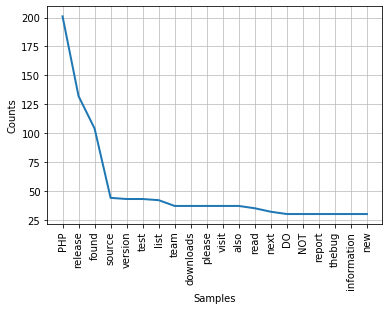

In [27]:
freq.plot(20,cumulative=False)

## Tokenizar

Vimos cómo dividir el texto en tokens utilizando la función split; ahora veremos cómo convertir el texto en tokens con NLTK.

Tokenizar el texto es importante ya que el texto no se puede procesar sin tokenizarlo. El proceso de tokenización significa dividir partes más grandes en partes pequeñas.

Puedes convertir párrafos en oraciones y confeccionar frases en palabras según tus necesidades. NLTK contiene un tokenizador de frase y un tokenizador de palabra.

In [28]:
from nltk.tokenize import sent_tokenize
 
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
 
print(sent_tokenize(mytext))

['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [29]:
from nltk.tokenize import sent_tokenize
 
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
 
print(sent_tokenize(mytext))

['Hello Mr. Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


In [30]:
from nltk.tokenize import word_tokenize
 
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
 
print(word_tokenize(mytext))

['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


Tokenizar textos que no están en inglés
Para tokenizar otros idiomas, puedes especificar el idioma de esta manera:

In [31]:
from nltk.tokenize import sent_tokenize
 
mytext = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
 
print(sent_tokenize(mytext,"french"))

['Bonjour M. Adam, comment allez-vous?', "J'espère que tout va bien.", "Aujourd'hui est un bon jour."]


## Obtener sinónimos de WordNet

Si recuerdas, instalamos paquetes NLTK usando nltk.download(). Uno de los paquetes fue WordNet.

WordNet es una base de datos creada para el procesamiento del lenguaje natural. Incluye grupos de sinónimos y una breve definición.

Puedes obtener estas definiciones y ejemplos para una palabra dada como esta:

In [32]:
from nltk.corpus import wordnet
 
syn = wordnet.synsets("pain")
 
print(syn[0].definition())
 
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [33]:
from nltk.corpus import wordnet
 
syn = wordnet.synsets("NLP")
 
print(syn[0].definition())
 
syn = wordnet.synsets("Python")
 
print(syn[0].definition())

the branch of information science that deals with natural language information
large Old World boas


In [34]:
from nltk.corpus import wordnet
 
synonyms = []
 
for syn in wordnet.synsets('Computer'):
 
    for lemma in syn.lemmas():
 
        synonyms.append(lemma.name())
print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


## Obtener antónimos de WordNet
Puedes obtener los antónimos de las palabras de la misma manera. Antes de agregarlos a la matriz, todo lo que tienes que hacer es verificar si cada lema es un antónimo o no.

In [35]:
from nltk.corpus import wordnet
 
antonyms = []
 
for syn in wordnet.synsets("small"):
 
    for l in syn.lemmas():
 
        if l.antonyms():
 
            antonyms.append(l.antonyms()[0].name())
print(antonyms)

['large', 'big', 'big']


## Derivación regresiva con NLTK (Word Stemming)
La derivación regresiva significa eliminar afijos de las palabras y encontrar la palabra raíz. Ej: La raíz de la palabra trabajando = > trabajo.

Los motores de búsqueda utilizan esta técnica al indexar páginas, puesto que muchas personas escriben versiones diferentes para la misma palabra y todas derivan de la palabra raíz.

In [36]:
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
 
print(stemmer.stem('working'))

work


In [37]:
#palabras que no sean en ingles?
from nltk.stem import SnowballStemmer
 
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [38]:
from nltk.stem import SnowballStemmer
 
french_stemmer = SnowballStemmer('french')
##los franceses me pueden decir de esta palabra :)
print(french_stemmer.stem("French word"))

french word


## Palabras lematizadoras usando WordNet (Lemmatize Words)
Lematizar palabras es similar a la derivación regresiva; pero, la diferencia es el que la lematización es el mundo real.

A diferencia de la derivación regresiva, cuando intentas derivar algunas palabras, dará como resultado algo como esto:

In [39]:
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
 
print(stemmer.stem('increases'))

increas


In [40]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('increases'))

increase


El resultado puede terminar con un sinónimo o una palabra diferente, pero con el mismo significado.

A veces, si tratas de lematizar una palabra como la palabra playing, terminarás con la misma palabra.

Esto se debe a que la parte del habla predeterminada son sustantivos. Para obtener verbos, debes especificar así:

In [41]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('playing', pos="v"))

play


En realidad, este es un muy buen nivel de compresión de texto, terminas con una compresión del 50% al 60%.

El resultado podría ser un verbo, sustantivo, adjetivo o adverbio:

In [42]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('playing', pos="v"))
 
print(lemmatizer.lemmatize('playing', pos="n"))
 
print(lemmatizer.lemmatize('playing', pos="a"))
 
print(lemmatizer.lemmatize('playing', pos="r"))

play
playing
playing
playing


## Diferencia de derivación regresiva y lematización
Bien, vamos a intentar a derivar y lematizar algunas palabras:

In [43]:
from nltk.stem import WordNetLemmatizer
 
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
 
lemmatizer = WordNetLemmatizer()
 
print(stemmer.stem('stones'))
 
print(stemmer.stem('speaking'))
 
print(stemmer.stem('bedroom'))
 
print(stemmer.stem('jokes'))
 
print(stemmer.stem('lisa'))
 
print(stemmer.stem('purple'))
 
print('----------------------')
 
print(lemmatizer.lemmatize('stones'))
 
print(lemmatizer.lemmatize('speaking'))
 
print(lemmatizer.lemmatize('bedroom'))
 
print(lemmatizer.lemmatize('jokes'))
 
print(lemmatizer.lemmatize('lisa'))
 
print(lemmatizer.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking
bedroom
joke
lisa
purple


La derivación funciona con palabras sin conocer su contexto y es por eso que la raíz tiene una precisión menor, pero, es más rápida que la lematización.

En mi opinión, la lematización es mejor que la derivación. Word lemmatizing devuelve una palabra real, incluso si no es la misma palabra, podría ser un sinónimo, pero al menos es una palabra real.

A veces no te importa este nivel de precisión y todo lo que necesitas es velocidad, en este caso, la derivación es mejor.